In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta

In [17]:
# =============================================================================
# 1. Calculate quantiles for simulation outputs.
# =============================================================================

def calculate_quantiles(simulations, quantiles):
    return {q: np.quantile(simulations, q, axis=0) for q in quantiles}

In [18]:
# =============================================================================
# 2. Plot forecasts.
# This function plots observed data, the median forecast, and quantile intervals.
# =============================================================================

def plot_forecasts_with_horizon(filtered_country, quantile_results, median_forecast, selected_horizons, country_name):
    plt.figure(figsize=(12, 6))
    plt.plot(filtered_country['truth_date'], filtered_country['value'], label='True Data', color='black', marker='.', linestyle='-')
    plt.plot(selected_horizons, median_forecast, label='Median Forecast', color='blue', linestyle='-', marker='x')
    plt.fill_between(selected_horizons, quantile_results[0.05], quantile_results[0.95], color='blue', alpha=0.2, label='90% CI')
    plt.fill_between(selected_horizons, quantile_results[0.25], quantile_results[0.75], color='blue', alpha=0.4, label='50% CI')
    plt.ylabel('Hospitalizations')
    plt.title(country_name)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    
    # Save the plot as a PNG file (Optional)
    #plt.savefig(f'{country_name}_forecast.png', dpi=300, bbox_inches='tight')
    plt.show()

In [19]:
# =============================================================================
# 3. Compute the target end date.
# The target end date is the Sunday at the end of the forecast week.
# =============================================================================

def create_target_end_date(origin_date_str, weeks_offset):
    origin_date = datetime.strptime(origin_date_str, "%Y-%m-%d")
    weekday_origin = origin_date.weekday()  # Monday=0, Sunday=6
    next_sunday = origin_date + timedelta(days=(6 - weekday_origin))
    target_end_date = next_sunday + timedelta(weeks=weeks_offset - 2)
    return target_end_date.strftime('%Y-%m-%d')

In [ ]:
# =============================================================================
# 4. Compute Weighted MAPE for best simulations selection.
# =============================================================================

def weighted_mean_absolute_percentage_error(y_true, y_pred, weeks=4):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    days = weeks * 7
    min_len = min(len(y_true), len(y_pred), days)
    y_true_last_weeks = y_true[-min_len:]
    y_pred_last_weeks = y_pred[-min_len:]
    y_true_last_weeks = np.where(y_true_last_weeks == 0, 1e-10, y_true_last_weeks)

    absolute_percentage_errors = np.abs((y_true_last_weeks - y_pred_last_weeks) / y_true_last_weeks) * 100

    # Assign inverse weights: most recent data has highest weight
    # e.g., weights = [1/N, 1/(N-1), ..., 1/1]
    weights = 1 / np.arange(min_len, 0, -1)

    return np.average(absolute_percentage_errors, weights=weights)


In [24]:
# =============================================================================
# 5. Generate the results DataFrame.
# The dataframe contains all required forecast columns for submission. 
# =============================================================================
def generate_results_df(quantiles_to_compute, quantile_results_resampled, median_forecast_resampled, origin_date, country_name):
    results_df = pd.DataFrame(columns=['origin_date', 'target', 'target_end_date', 'horizon', 'location', 'output_type', 'output_type_id', 'value'])
    selected_weeks = range(-1, 5)
    
    for q in quantiles_to_compute:
        for week in selected_weeks:
            target_end_date = create_target_end_date(origin_date, week)
            result_data = {
                'origin_date': origin_date,
                'target': 'hospital admissions',
                'target_end_date': target_end_date,
                'horizon': week,
                'location': country_name,
                'output_type': 'quantile',
                'output_type_id': f'{q:.3f}',
                'value': quantile_results_resampled[q].get(target_end_date, None)
            }
            results_df = pd.concat([results_df, pd.DataFrame([result_data])], ignore_index=True)
    
    for week in selected_weeks:
        target_end_date = create_target_end_date(origin_date, week)
        result_data = {
            'origin_date': origin_date,
            'target': 'hospital admissions',
            'target_end_date': target_end_date,
            'horizon': week,
            'location': country_name,
            'output_type': 'median',
            'output_type_id': '',
            'value': median_forecast_resampled.get(target_end_date, None)
        }
        results_df = pd.concat([results_df, pd.DataFrame([result_data])], ignore_index=True)
    return results_df


Validation processing for countries: ['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GR', 'HU', 'IE', 'IS', 'IT', 'LI', 'LT', 'LU', 'LV', 'MT', 'NL', 'PL', 'PT', 'RO', 'SE', 'SI', 'SK']

Processing validation for country: AT
Simulation results not found for country AT. Skipping.

Processing validation for country: BE
Simulation results not found for country BE. Skipping.

Processing validation for country: BG
Simulation results not found for country BG. Skipping.

Processing validation for country: CY


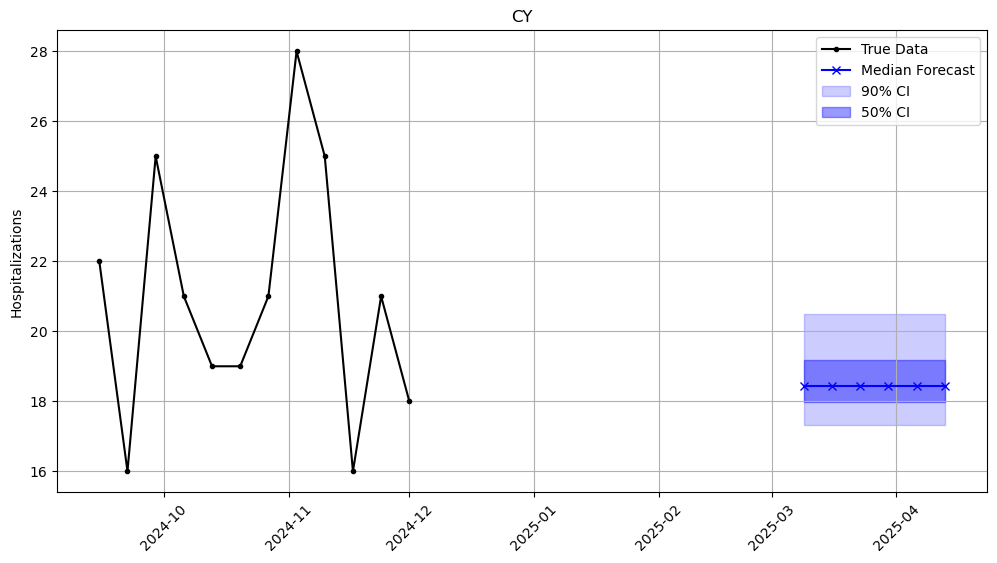

/var/folders/jh/718p_24d48v_nltwy8_258640000gp/T/ipykernel_12863/1143467746.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([result_data])], ignore_index=True)



Processing validation for country: CZ


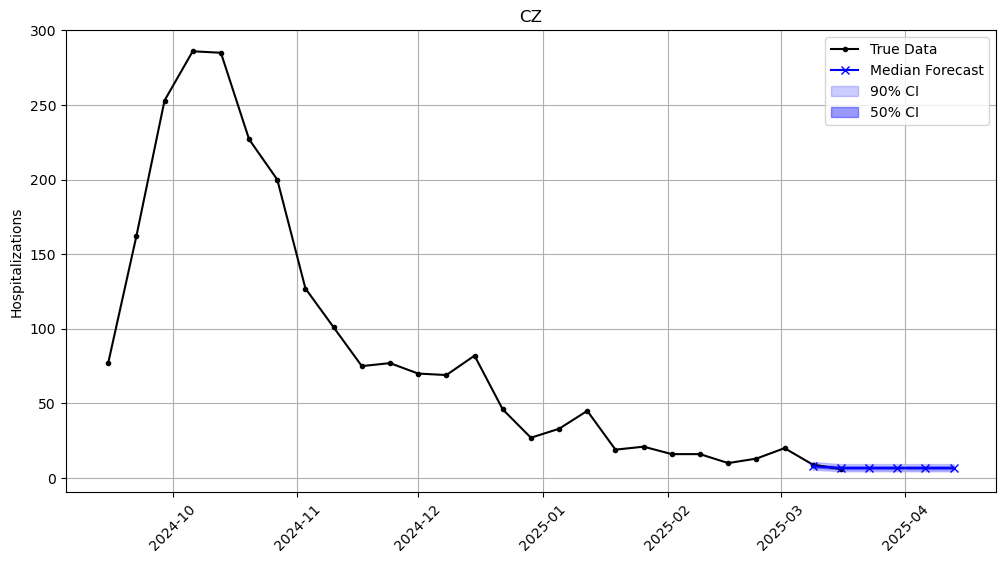

/var/folders/jh/718p_24d48v_nltwy8_258640000gp/T/ipykernel_12863/1143467746.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([result_data])], ignore_index=True)



Processing validation for country: DE
Simulation results not found for country DE. Skipping.

Processing validation for country: DK
Simulation results not found for country DK. Skipping.

Processing validation for country: EE
Simulation results not found for country EE. Skipping.

Processing validation for country: ES
Simulation results not found for country ES. Skipping.

Processing validation for country: FI
Simulation results not found for country FI. Skipping.

Processing validation for country: FR


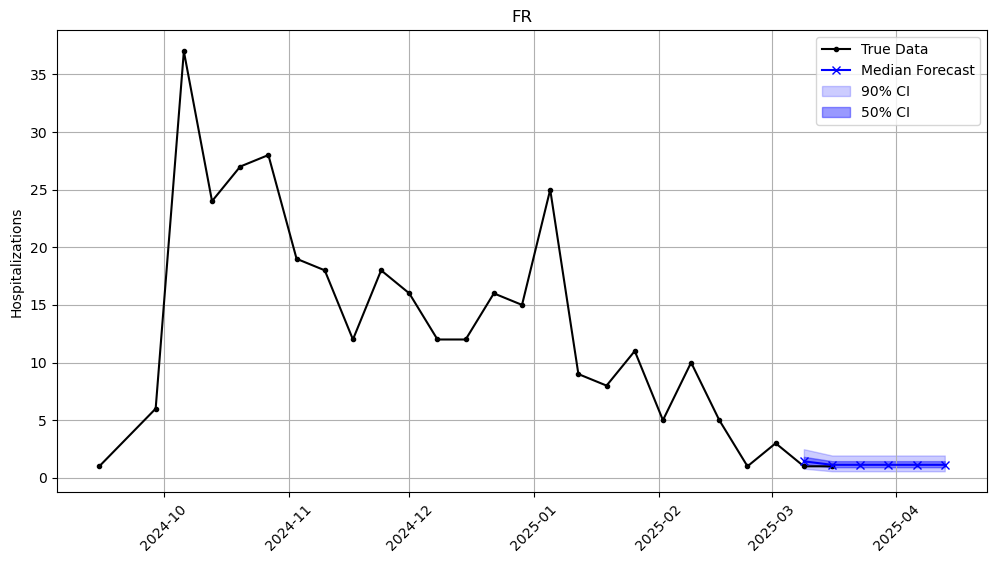

/var/folders/jh/718p_24d48v_nltwy8_258640000gp/T/ipykernel_12863/1143467746.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([result_data])], ignore_index=True)



Processing validation for country: GR


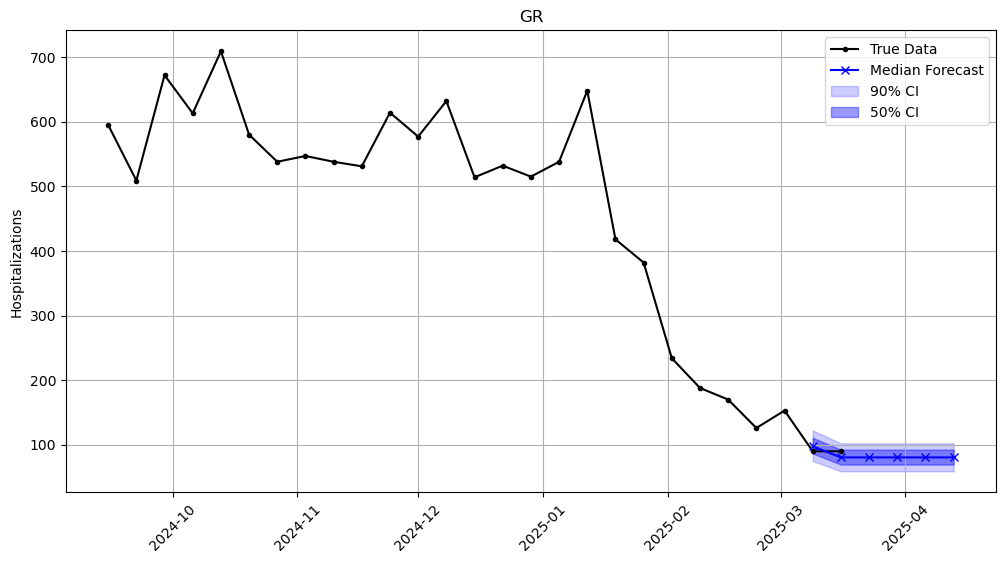

/var/folders/jh/718p_24d48v_nltwy8_258640000gp/T/ipykernel_12863/1143467746.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([result_data])], ignore_index=True)



Processing validation for country: HU


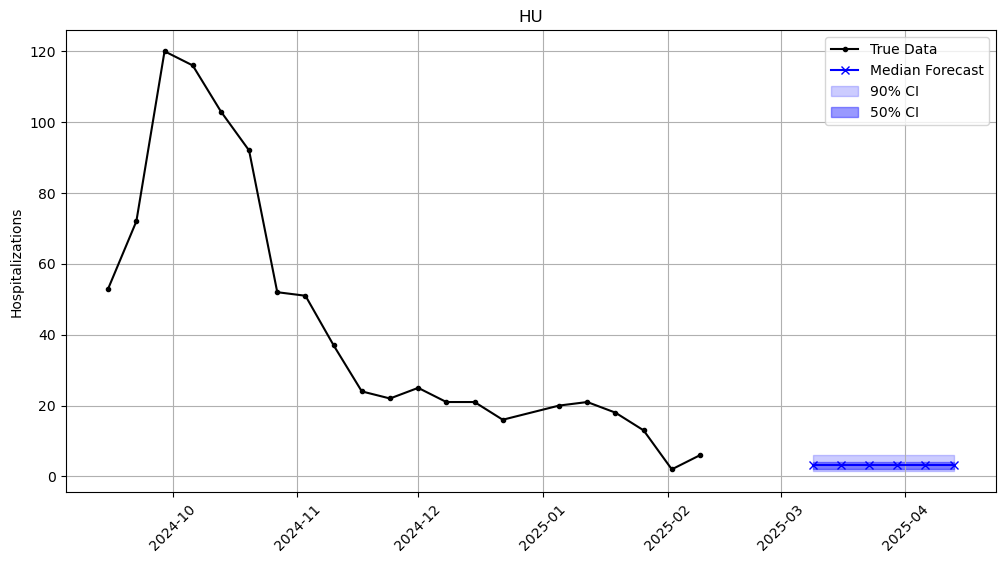

/var/folders/jh/718p_24d48v_nltwy8_258640000gp/T/ipykernel_12863/1143467746.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([result_data])], ignore_index=True)



Processing validation for country: IE


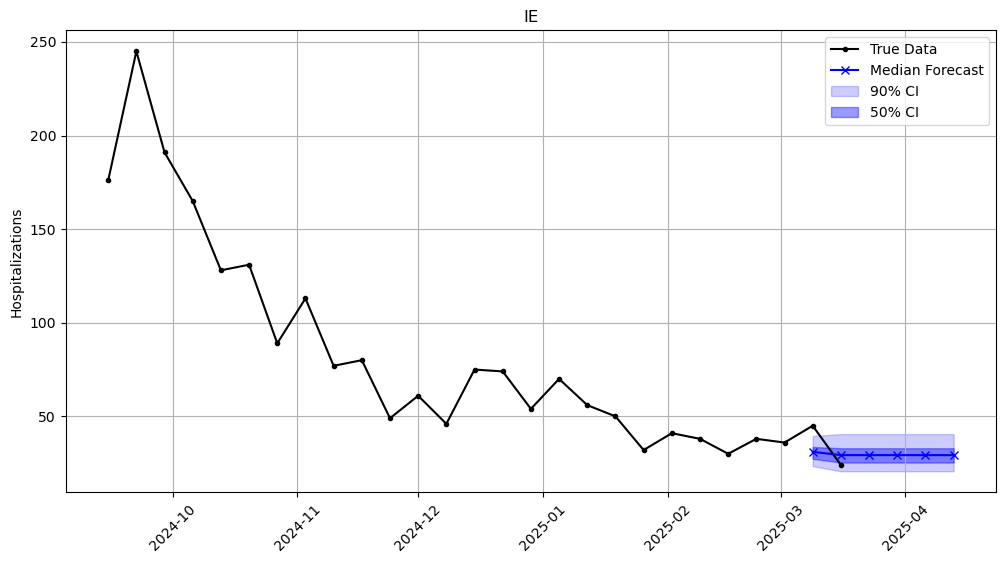

/var/folders/jh/718p_24d48v_nltwy8_258640000gp/T/ipykernel_12863/1143467746.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([result_data])], ignore_index=True)



Processing validation for country: IS
Simulation results not found for country IS. Skipping.

Processing validation for country: IT


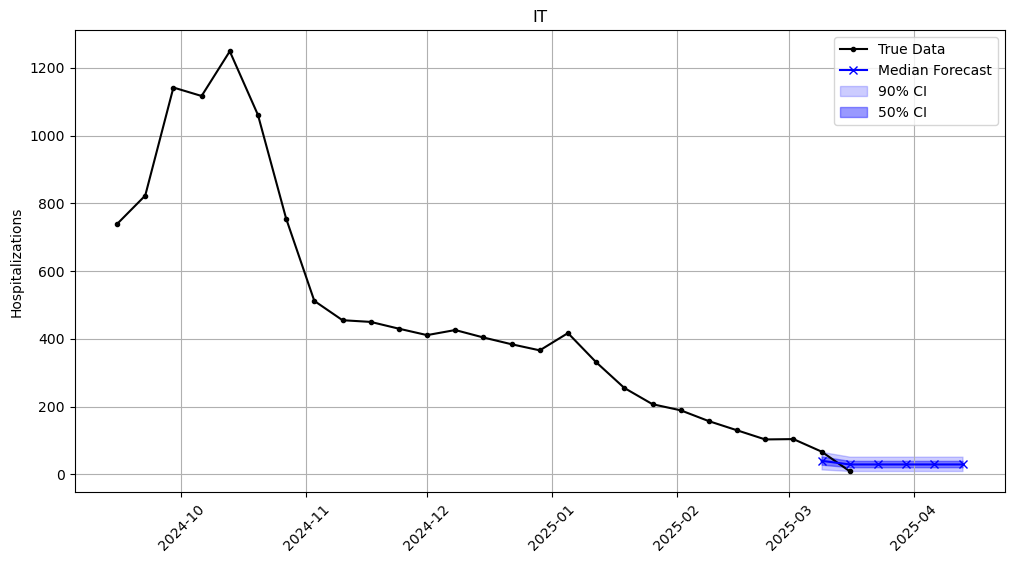

/var/folders/jh/718p_24d48v_nltwy8_258640000gp/T/ipykernel_12863/1143467746.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([result_data])], ignore_index=True)



Processing validation for country: LI
Simulation results not found for country LI. Skipping.

Processing validation for country: LT


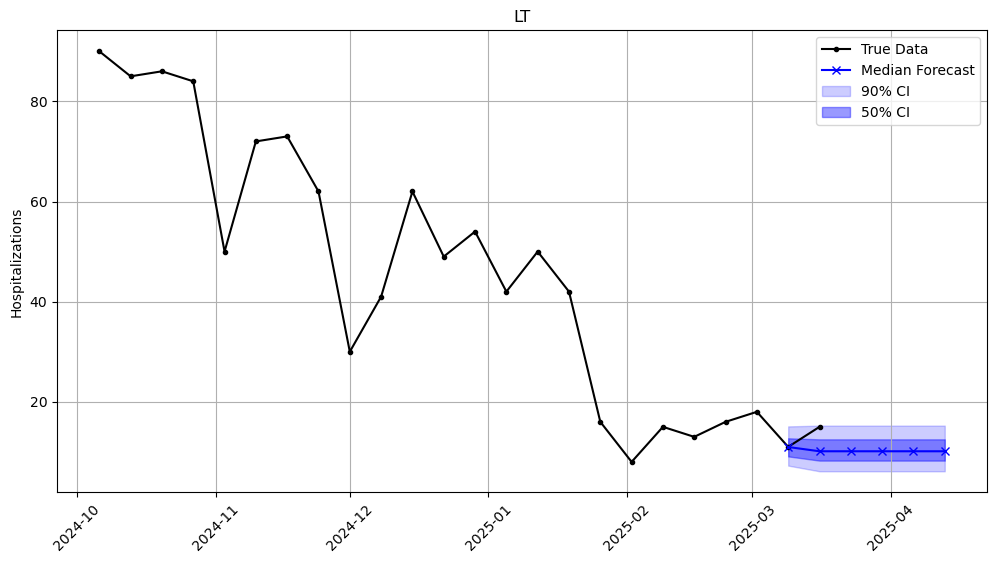

/var/folders/jh/718p_24d48v_nltwy8_258640000gp/T/ipykernel_12863/1143467746.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([result_data])], ignore_index=True)



Processing validation for country: LU
Simulation results not found for country LU. Skipping.

Processing validation for country: LV
Simulation results not found for country LV. Skipping.

Processing validation for country: MT


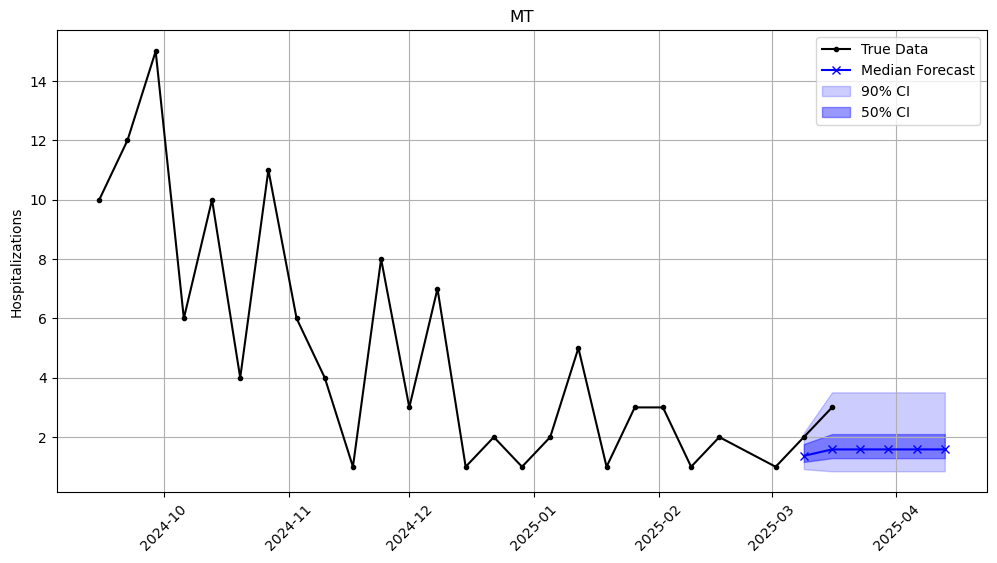

/var/folders/jh/718p_24d48v_nltwy8_258640000gp/T/ipykernel_12863/1143467746.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([result_data])], ignore_index=True)



Processing validation for country: NL
Simulation results not found for country NL. Skipping.

Processing validation for country: PL


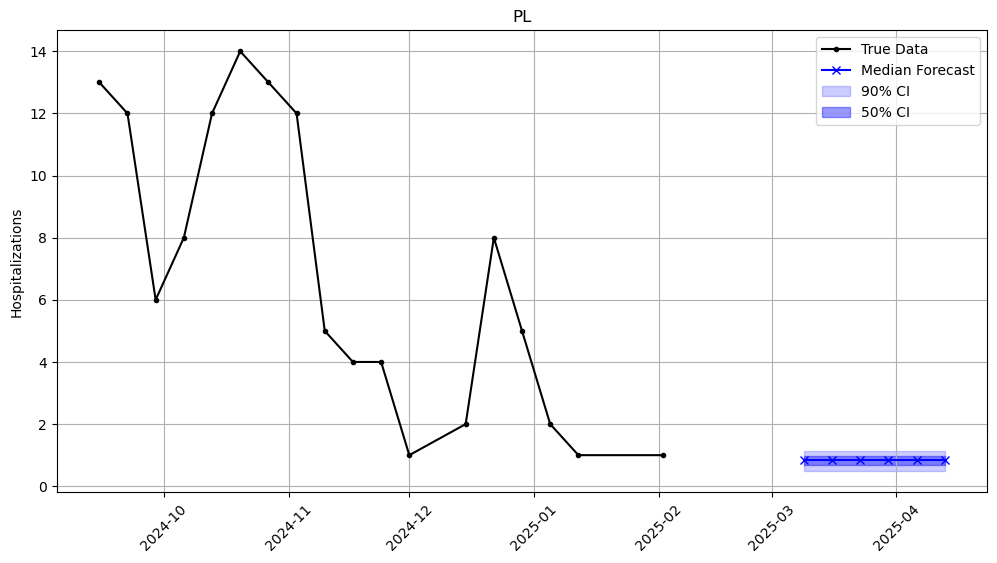

/var/folders/jh/718p_24d48v_nltwy8_258640000gp/T/ipykernel_12863/1143467746.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([result_data])], ignore_index=True)



Processing validation for country: PT


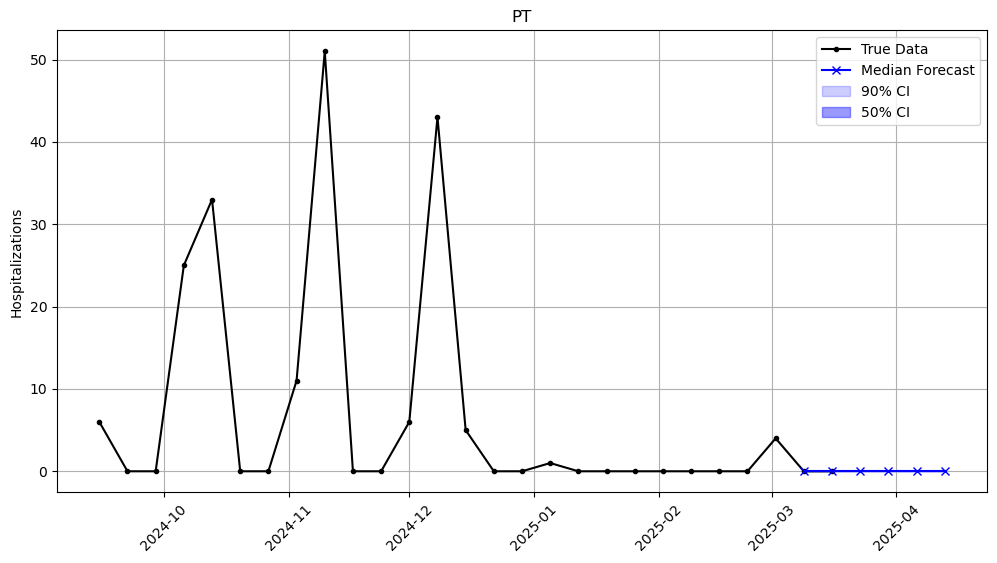

/var/folders/jh/718p_24d48v_nltwy8_258640000gp/T/ipykernel_12863/1143467746.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([result_data])], ignore_index=True)



Processing validation for country: RO
Simulation results not found for country RO. Skipping.

Processing validation for country: SE
Simulation results not found for country SE. Skipping.

Processing validation for country: SI
Simulation results not found for country SI. Skipping.

Processing validation for country: SK


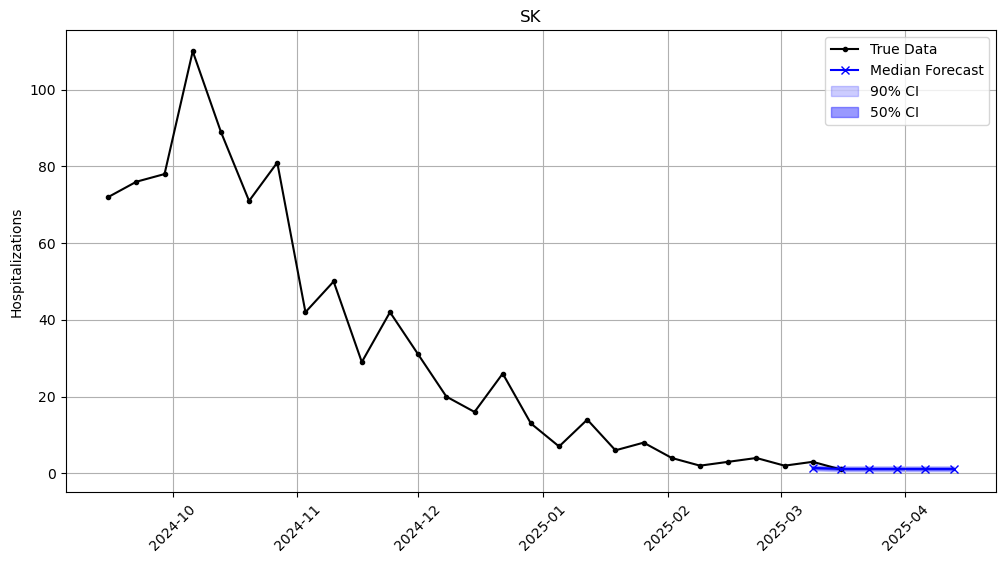


✅ Tutti i risultati salvati in: 2025-03-26-ISI-SEIR_BRW_COVID_ALL.csv


/var/folders/jh/718p_24d48v_nltwy8_258640000gp/T/ipykernel_12863/1143467746.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([result_data])], ignore_index=True)


In [ ]:
# =============================================================================
# 6. Main - Process all available countries.
# - Load simulation results from the "simulations_data" folder.
# - For each country, select the best 100 simulations based on MAPE.
# - Compute forecast quantiles and median forecast from the selected simulations.
# - Re-index to target dates, plot the forecast, and generate the final CSV.
# =============================================================================
if __name__ == '__main__':
    origin_date = '2025-03-26'
    simulation_folder = "simulations_data"
    
    true_data = pd.read_csv("https://raw.githubusercontent.com/european-modelling-hubs/RespiCast-Covid19/refs/heads/main/target-data/latest-hospital_admissions.csv")
    true_data['truth_date'] = pd.to_datetime(true_data['truth_date'])
    
    unique_countries = sorted(true_data['location'].unique())
    print("Validation processing for countries:", unique_countries)
    
    quantiles_to_compute = [0.010, 0.025, 0.050, 0.100, 0.150, 0.200, 0.250, 0.300, 0.350, 0.400, 0.450, 0.500,
                            0.550, 0.600, 0.650, 0.700, 0.750, 0.800, 0.850, 0.900, 0.950, 0.975, 0.990]

    all_results = []

    for country in unique_countries:
        print(f"\nProcessing validation for country: {country}")
        simulation_path = os.path.join(simulation_folder, f'simulations_{country}.npy')
        try:
            simulations_array = np.load(simulation_path)
        except FileNotFoundError:
            print(f"Simulation results not found for country {country}. Skipping.")
            continue
        
        # Filter true data
        filtered_country = true_data[true_data['location'] == country].copy()
        filtered_country = filtered_country[(filtered_country['truth_date'] >= '2024-09-15')]
        filtered_country = filtered_country.sort_values(by='truth_date').reset_index(drop=True)

        # Use observed dates as index
        horizon_dates = filtered_country['truth_date']
        observed = filtered_country['value'].values

        # Compute MAPE for each simulation
        mape_list = []
        for sim in simulations_array:
            mape_val = weighted_mean_absolute_percentage_error(observed, sim[-len(observed):])
            mape_list.append(mape_val)
        mape_array = np.array(mape_list)

        # Select best 100 simulations by MAPE
        best_indices = np.argsort(mape_array)[:100]
        best_simulations = simulations_array[best_indices, :]

        # Ensure simulation and observed date lengths match
        filtered_len = filtered_country.shape[0]
        sim_len = best_simulations.shape[1]
        min_len = min(filtered_len, sim_len)
        horizon_dates = horizon_dates[-min_len:]
        best_simulations = best_simulations[:, -min_len:]

        # Calculate quantiles
        quantile_results = calculate_quantiles(best_simulations, quantiles_to_compute)

        # Target dates for forecast (week -1 to 4)
        target_dates = [pd.to_datetime(create_target_end_date(origin_date, week)) for week in range(-1, 5)]

        # Reindex quantiles and median forecast to match target_dates
        quantile_results_resampled = {
            q: pd.Series(quantile_results[q], index=horizon_dates).reindex(target_dates, method='nearest')
            for q in quantiles_to_compute
        }

        median_forecast = np.median(best_simulations, axis=0)
        median_forecast_series = pd.Series(median_forecast, index=horizon_dates)
        median_forecast_resampled = median_forecast_series.reindex(target_dates, method='nearest')

        # Plot (optional, can be commented out if not needed)
        selected_horizons = target_dates
        plot_forecasts_with_horizon(filtered_country, quantile_results_resampled, median_forecast_resampled, selected_horizons, country)

        # Generate DataFrame and collect results
        results_df = generate_results_df(quantiles_to_compute, quantile_results_resampled, median_forecast_resampled, origin_date, country)
        all_results.append(results_df)

    # Save all country results in a single file
    final_df = pd.concat(all_results, ignore_index=True)
    final_df.to_csv(f'{origin_date}-ISI-SEIR_BRW_COVID_ALL.csv', index=False)
    print(f"\n✅ Tutti i risultati salvati in: {origin_date}-ISI-SEIR_BRW_COVID_ALL.csv")
